In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
health = pd.read_csv('C:/Users/yongchae/Desktop/SKN/국민건강보험공단_건강검진정보_2023.CSV', encoding = 'cp949')

In [45]:
health.head().T

,0,1,2,3,4
기준년도,2023.0,2023.0,2023.0,2023.0,2023.0
가입자일련번호,34735.0,4105118.0,362482.0,653166.0,4152237.0
시도코드,46.0,11.0,36.0,11.0,41.0
성별코드,2.0,1.0,2.0,1.0,1.0
연령대코드(5세단위),9.0,17.0,13.0,13.0,12.0
신장(5cm단위),155.0,160.0,150.0,160.0,165.0
체중(5kg단위),70.0,55.0,65.0,70.0,65.0
허리둘레,92.0,86.0,96.0,85.0,84.5
시력(좌),1.2,0.9,1.0,1.0,1.0
시력(우),1.2,9.9,0.8,1.2,1.2


In [29]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 33 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자일련번호        1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대코드(5세단위)    1000000 non-null  int64  
 5   신장(5cm단위)      1000000 non-null  int64  
 6   체중(5kg단위)      1000000 non-null  int64  
 7   허리둘레           999589 non-null   float64
 8   시력(좌)          999816 non-null   float64
 9   시력(우)          999823 non-null   float64
 10  청력(좌)          999863 non-null   float64
 11  청력(우)          999862 non-null   float64
 12  수축기혈압          994253 non-null   float64
 13  이완기혈압          994253 non-null   float64
 14  식전혈당(공복혈당)     994186 non-null   float64
 15  총콜레스테롤         338606 non-null   float64
 16  트리글리세라이드       338606 non-null   float64
 17  HDL콜레스테롤 

In [34]:
colle = health.loc[health['총콜레스테롤'].notna(), ['성별코드', '연령대코드(5세단위)', '총콜레스테롤', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '식전혈당(공복혈당)', '흡연상태', '음주여부']].reset_index(drop = True)
colle.head().T

,0,1,2,3,4
성별코드,2.0,2.0,1.0,1.0,2.0
연령대코드(5세단위),9.0,13.0,13.0,10.0,13.0
총콜레스테롤,168.0,220.0,91.0,194.0,212.0
신장(5cm단위),155.0,150.0,160.0,165.0,150.0
체중(5kg단위),70.0,65.0,70.0,80.0,70.0
허리둘레,92.0,96.0,85.0,89.0,97.0
식전혈당(공복혈당),98.0,114.0,98.0,74.0,112.0
흡연상태,1.0,1.0,3.0,2.0,1.0
음주여부,1.0,1.0,1.0,1.0,1.0


In [35]:
colle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338606 entries, 0 to 338605
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   성별코드         338606 non-null  int64  
 1   연령대코드(5세단위)  338606 non-null  int64  
 2   총콜레스테롤       338606 non-null  float64
 3   신장(5cm단위)    338606 non-null  int64  
 4   체중(5kg단위)    338606 non-null  int64  
 5   허리둘레         338590 non-null  float64
 6   식전혈당(공복혈당)   338606 non-null  float64
 7   흡연상태         338571 non-null  float64
 8   음주여부         338584 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 23.3 MB


In [37]:
missing_ratio = colle.isnull().mean()
columns_to_drop = missing_ratio[missing_ratio > 0.65].index.tolist()

colle_drop = colle.drop(columns=columns_to_drop, axis=1)
# health_drop = health_drop.drop(['가입자일련번호', '기준년도'], axis=1)

In [38]:
# 결측값이 있는 컬럼 리스트 추출
missing_cols = colle_drop.columns[colle_drop.isnull().any()].tolist()

# 연령대코드(5세단위)로 그룹화해서 결측값 채우기
for col in missing_cols:
    unique_vals = colle_drop[col].nunique(dropna=True)

    if unique_vals <= 6:
        # 최빈값으로 채우기 (각 연령대 그룹별)
        colle_drop[col] = colle_drop.groupby('연령대코드(5세단위)')[col].transform(
            lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x)
        )
    else:
        # 평균으로 채우기 (각 연령대 그룹별)
        colle_drop[col] = colle_drop.groupby('연령대코드(5세단위)')[col].transform(
            lambda x: x.fillna(round(x.mean(),2))
        )

In [39]:
colle_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338606 entries, 0 to 338605
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   성별코드         338606 non-null  int64  
 1   연령대코드(5세단위)  338606 non-null  int64  
 2   총콜레스테롤       338606 non-null  float64
 3   신장(5cm단위)    338606 non-null  int64  
 4   체중(5kg단위)    338606 non-null  int64  
 5   허리둘레         338606 non-null  float64
 6   식전혈당(공복혈당)   338606 non-null  float64
 7   흡연상태         338606 non-null  float64
 8   음주여부         338606 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 23.3 MB


In [40]:
colle_drop.head().T

,0,1,2,3,4
성별코드,2.0,2.0,1.0,1.0,2.0
연령대코드(5세단위),9.0,13.0,13.0,10.0,13.0
총콜레스테롤,168.0,220.0,91.0,194.0,212.0
신장(5cm단위),155.0,150.0,160.0,165.0,150.0
체중(5kg단위),70.0,65.0,70.0,80.0,70.0
허리둘레,92.0,96.0,85.0,89.0,97.0
식전혈당(공복혈당),98.0,114.0,98.0,74.0,112.0
흡연상태,1.0,1.0,3.0,2.0,1.0
음주여부,1.0,1.0,1.0,1.0,1.0


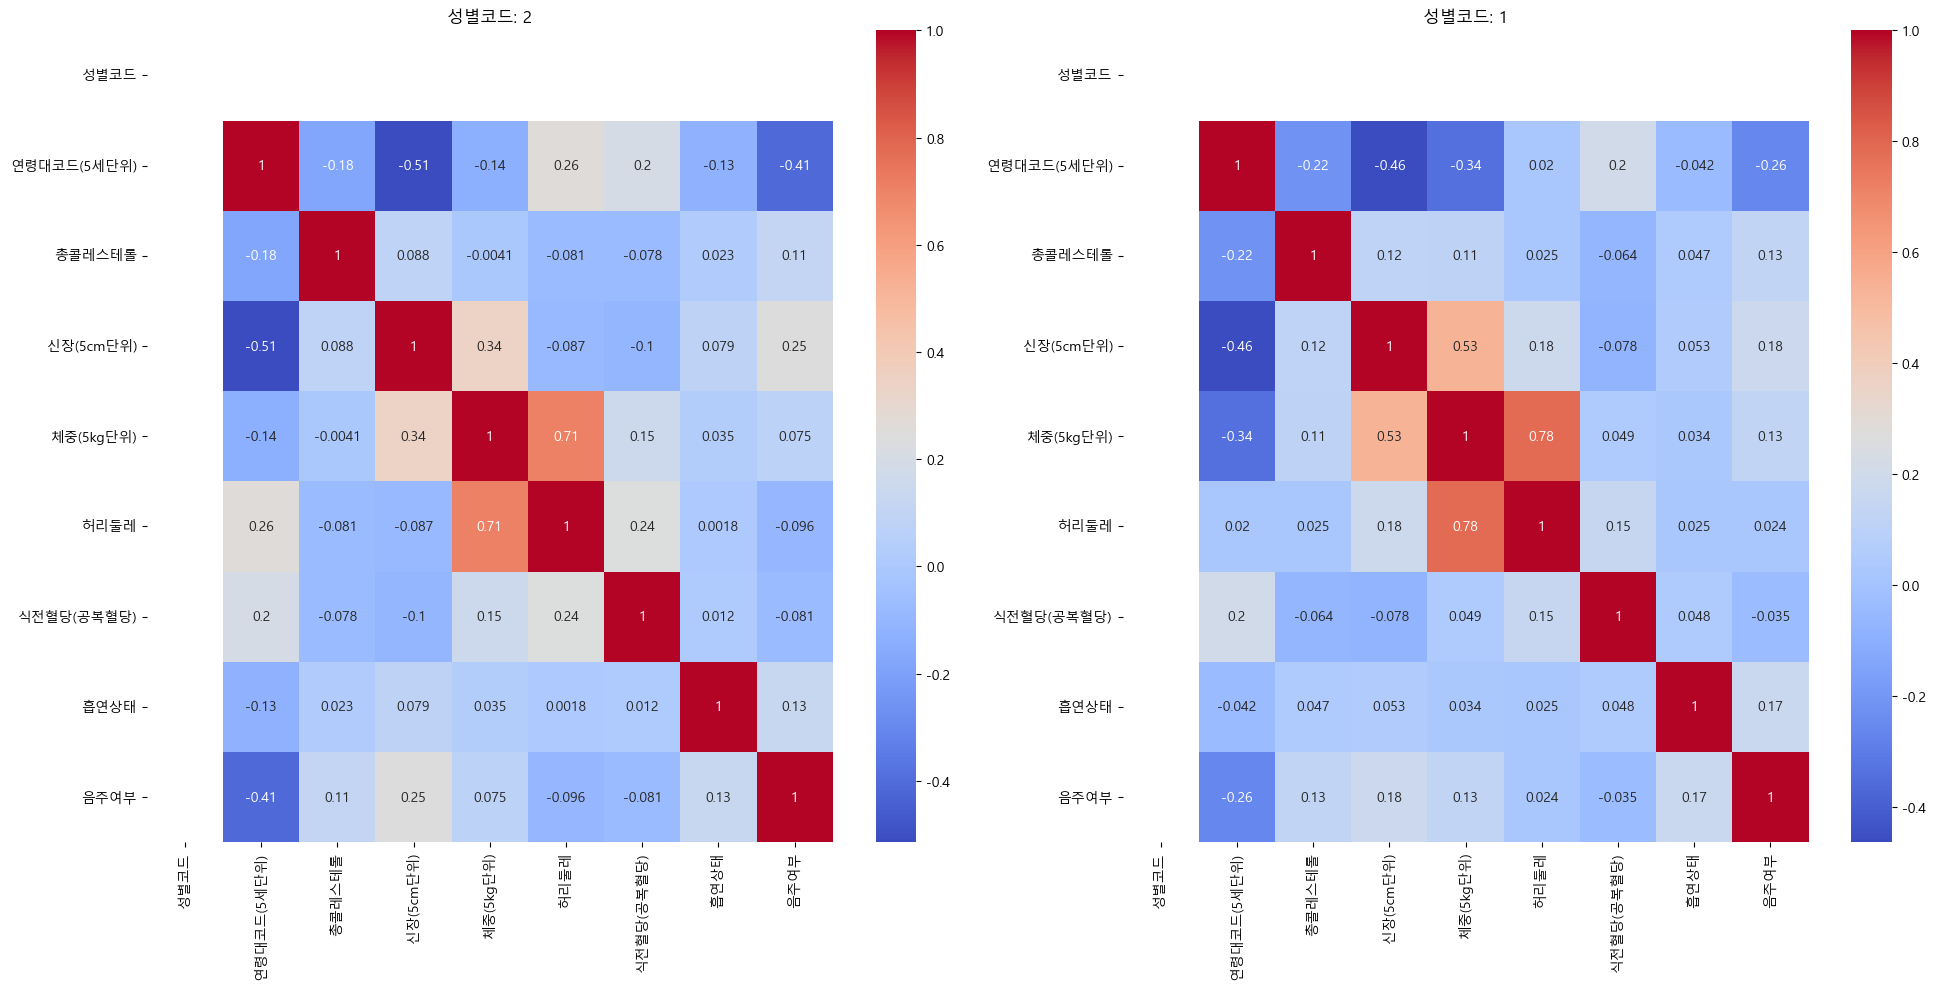

In [41]:
# 성별 값이 1 (예: 남자), 2 (예: 여자)라고 가정
gender_values = colle_drop['성별코드'].unique()

# 서브플롯 생성
fig, axes = plt.subplots(1, len(gender_values), figsize=(20, 10))

for i, gender in enumerate(gender_values):
    # 성별 필터링
    df_gender = colle_drop[colle_drop['성별코드'] == gender]

    # 상관행렬 계산
    corr = df_gender.corr(numeric_only=True)

    # 히트맵 그리기
    sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[i])
    axes[i].set_title(f'성별코드: {gender}')

plt.tight_layout()
plt.show()

In [47]:
missing_ratio = health.isnull().mean()
columns_to_drop = missing_ratio[missing_ratio > 0.65].index.tolist()

health_drop = health.drop(columns=columns_to_drop, axis=1)
health_drop = health_drop.drop(['가입자일련번호', '기준년도'], axis=1)

# 결측값이 있는 컬럼 리스트 추출
missing_cols = health_drop.columns[health_drop.isnull().any()].tolist()

# 연령대코드(5세단위)로 그룹화해서 결측값 채우기
for col in missing_cols:
    unique_vals = health_drop[col].nunique(dropna=True)

    if unique_vals <= 6:
        # 최빈값으로 채우기 (각 연령대 그룹별)
        health_drop[col] = health_drop.groupby('연령대코드(5세단위)')[col].transform(
            lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x)
        )
    else:
        # 평균으로 채우기 (각 연령대 그룹별)
        health_drop[col] = health_drop.groupby('연령대코드(5세단위)')[col].transform(
            lambda x: x.fillna(round(x.mean(),2))
        )

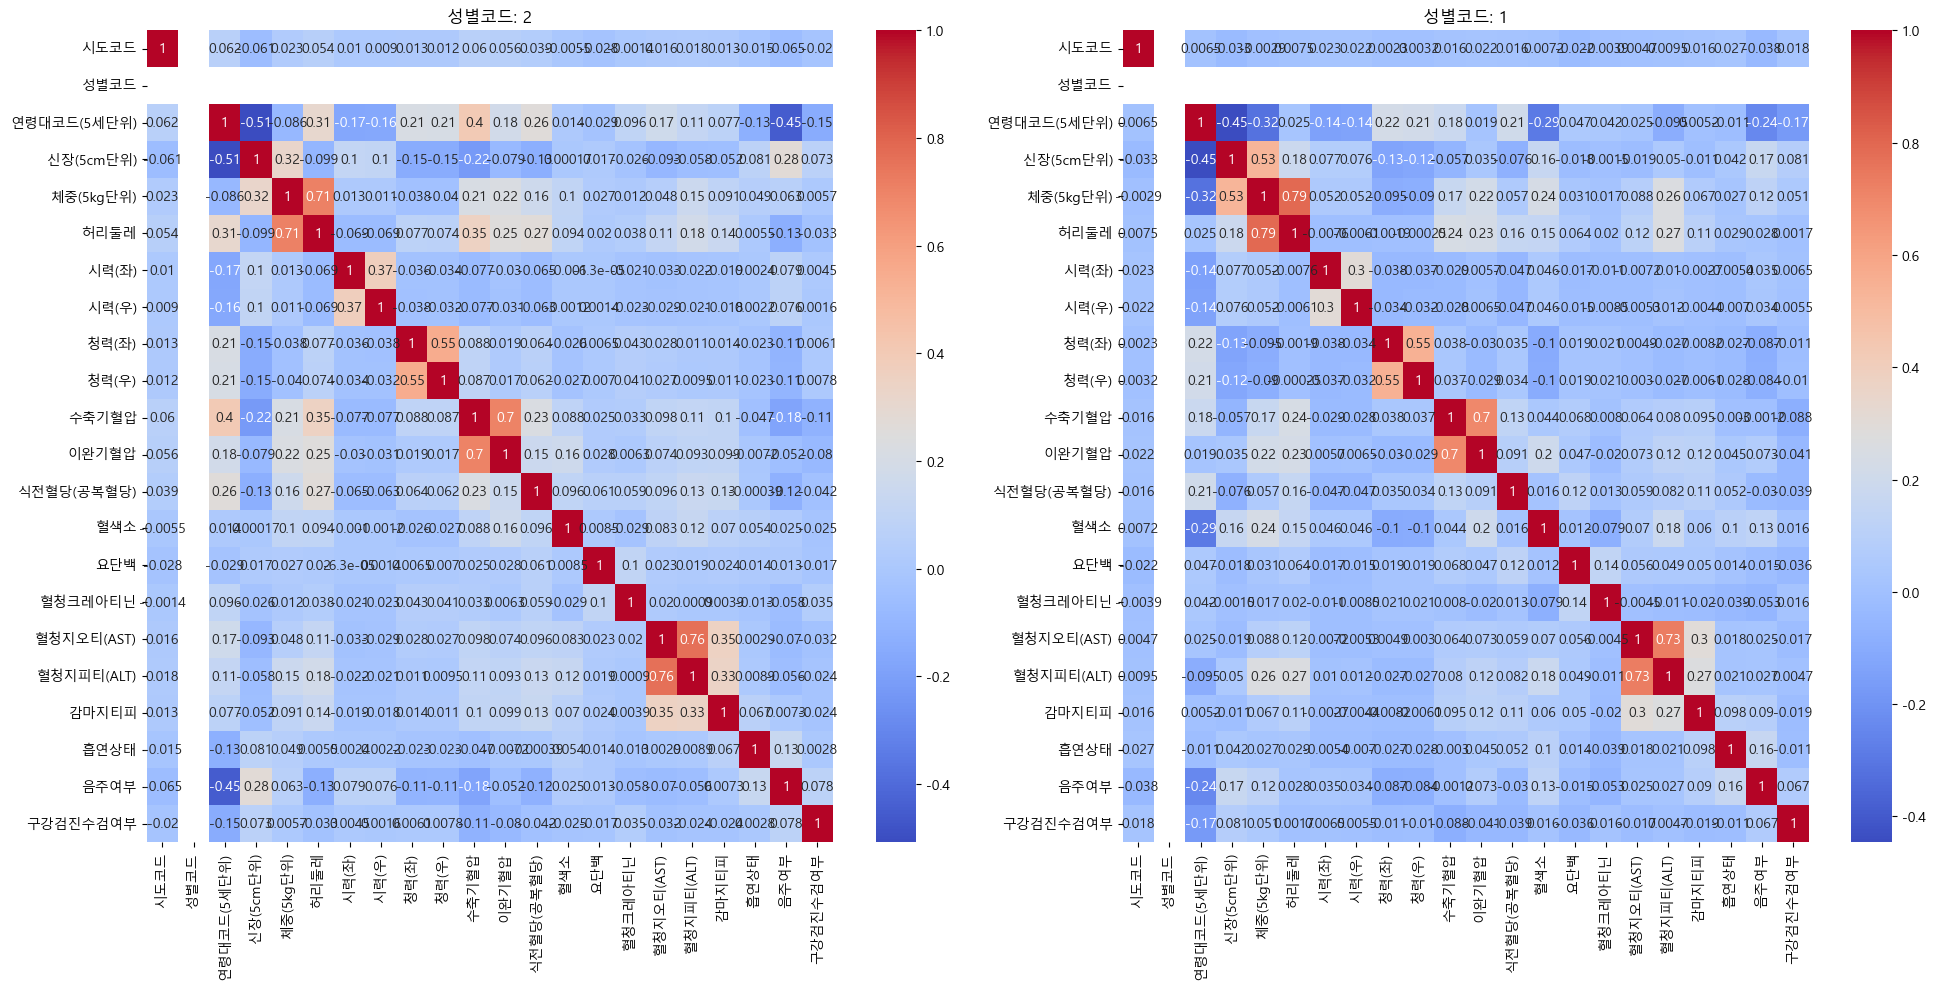

In [48]:
# 성별 값이 1 (예: 남자), 2 (예: 여자)라고 가정
gender_values = health_drop['성별코드'].unique()

# 서브플롯 생성
fig, axes = plt.subplots(1, len(gender_values), figsize=(20, 10))

for i, gender in enumerate(gender_values):
    # 성별 필터링
    df_gender = health_drop[health_drop['성별코드'] == gender]

    # 상관행렬 계산
    corr = df_gender.corr(numeric_only=True)

    # 히트맵 그리기
    sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[i])
    axes[i].set_title(f'성별코드: {gender}')

plt.tight_layout()
plt.show()

In [42]:
health.columns

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석'],
      dtype='object')

### 다시다시

In [50]:
health = pd.read_csv('C:/Users/yongchae/Desktop/SKN/국민건강보험공단_건강검진정보_2023.CSV', encoding = 'cp949')

In [51]:
health.isnull().sum()

기준년도                   0
가입자일련번호                0
시도코드                   0
성별코드                   0
연령대코드(5세단위)            0
신장(5cm단위)              0
체중(5kg단위)              0
허리둘레                 411
시력(좌)                184
시력(우)                177
청력(좌)                137
청력(우)                138
수축기혈압               5747
이완기혈압               5747
식전혈당(공복혈당)          5814
총콜레스테롤            661394
트리글리세라이드          661394
HDL콜레스테롤          661394
LDL콜레스테롤          667247
혈색소                 5817
요단백                11156
혈청크레아티닌             5814
혈청지오티(AST)          5816
혈청지피티(ALT)          5816
감마지티피               5813
흡연상태                  89
음주여부                  56
구강검진수검여부               0
치아우식증유무           653152
결손치 유무           1000000
치아마모증유무          1000000
제3대구치(사랑니) 이상    1000000
치석                653152
dtype: int64

In [87]:
health_drop = health[['성별코드', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '음주여부', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']]

In [88]:
na_col = ['혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피']
train = health_drop.loc[health_drop[na_col].notna().all(axis=1)]
test = health_drop.loc[health_drop[na_col].isna().all(axis=1)]

In [89]:
train.isnull().sum()

성별코드             0
연령대코드(5세단위)      0
신장(5cm단위)        0
체중(5kg단위)        0
허리둘레           410
음주여부            55
혈청크레아티닌          0
혈청지오티(AST)       0
혈청지피티(ALT)       0
감마지티피            0
dtype: int64

In [90]:
# 결측값이 있는 컬럼 리스트 추출
missing_cols = train.columns[train.isnull().any()].tolist()

# 연령대코드(5세단위)로 그룹화해서 결측값 채우기
for col in missing_cols:
    unique_vals = train[col].nunique(dropna=True)

    if unique_vals == 2:
        # 최빈값으로 채우기 (각 연령대 그룹별)
        train.loc[:,col] = train.groupby('연령대코드(5세단위)')[col].transform(
            lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x)
        )
    else:
        # 평균으로 채우기 (각 연령대 그룹별)
        train.loc[:,col] = train.groupby('연령대코드(5세단위)')[col].transform(
            lambda x: x.fillna(round(x.mean(),2))
        )

In [91]:
test.isnull().sum()

성별코드              0
연령대코드(5세단위)       0
신장(5cm단위)         0
체중(5kg단위)         0
허리둘레              1
음주여부              1
혈청크레아티닌        5813
혈청지오티(AST)     5813
혈청지피티(ALT)     5813
감마지티피          5813
dtype: int64

In [92]:
test = test.loc[test['음주여부'].notna()]
test = test.loc[test['허리둘레'].notna()]

In [93]:
len(train)

994182

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 994182 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   성별코드         994182 non-null  int64  
 1   연령대코드(5세단위)  994182 non-null  int64  
 2   신장(5cm단위)    994182 non-null  int64  
 3   체중(5kg단위)    994182 non-null  int64  
 4   허리둘레         994182 non-null  float64
 5   음주여부         994182 non-null  float64
 6   혈청크레아티닌      994182 non-null  float64
 7   혈청지오티(AST)   994182 non-null  float64
 8   혈청지피티(ALT)   994182 non-null  float64
 9   감마지티피        994182 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 83.4 MB


### 샘플 추출

In [150]:
def check_gpt_status(row):
    if row['성별코드'] == 1:
        return True if 11 <= row['감마지티피'] <= 631 else False
    elif row['성별코드'] == 2:
        return True if 8 <= row['감마지티피'] <= 351 else False
    else:
        return False  # 성별코드가 1도 2도 아닌 경우

# 적용
train.loc[:, 'grade'] = train.apply(check_gpt_status, axis=1)

In [151]:
train.head()

,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,음주여부,혈청크레아티닌,혈청지오티(AST),혈청지피티(ALT),감마지티피,grade
0,2,9,155,70,92.0,1.0,0.5,26.0,24.0,50.0,True
1,1,17,160,55,86.0,1.0,1.3,22.0,11.0,31.0,True
2,2,13,150,65,96.0,1.0,1.1,22.0,29.0,24.0,True
3,1,13,160,70,85.0,1.0,0.9,22.0,21.0,27.0,True
4,1,12,165,65,84.5,1.0,0.8,23.0,33.0,49.0,True


In [152]:
from sklearn.model_selection import train_test_split

sample_train, _ = train_test_split(train, train_size=1500, stratify=train['grade'], random_state=42)

In [110]:
sample_train = train.sample(n=1500, random_state=42)
sample_test = test.sample(n=30, random_state=42)

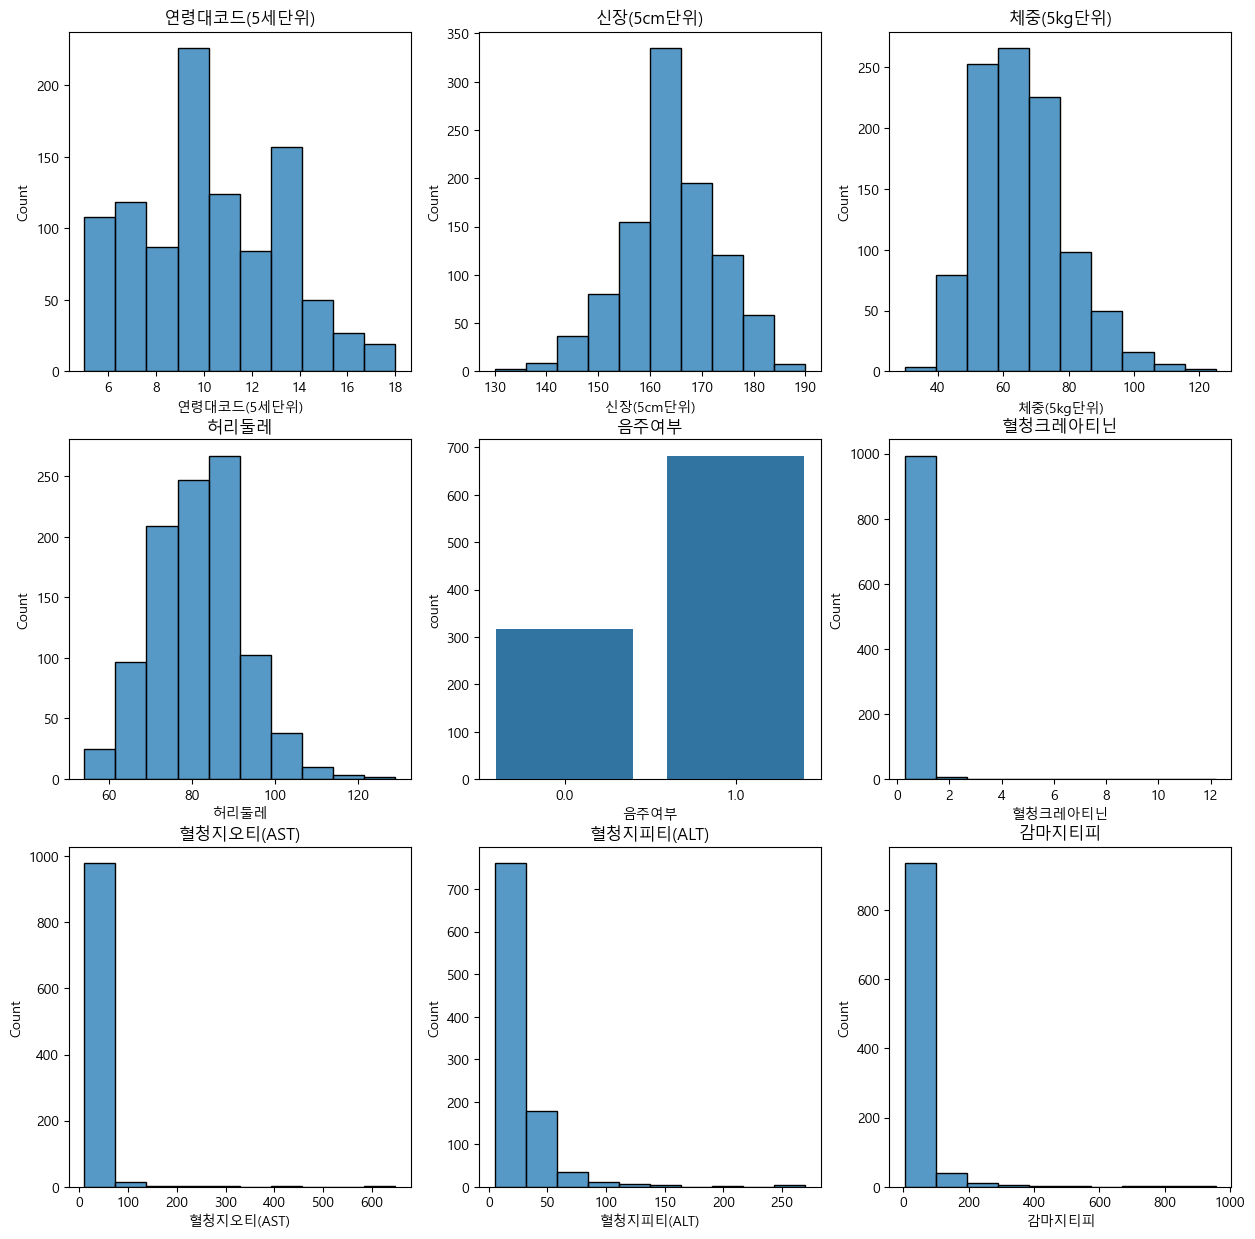

In [82]:
n = len(sample_train.columns)

ncols = 3
nrows = -(-n // ncols)  # 올림 나눗셈
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))
axes = axes.flatten()

for i, col in enumerate(sample_train.columns):
    if col == '음주여부':
        sns.countplot(data=sample_train, x=col, ax=axes[i])
        axes[i].set_title(f'{col}')
    else:
        sns.histplot(data=sample_train, x=col, bins = 10, ax=axes[i])
        axes[i].set_title(f'{col}')

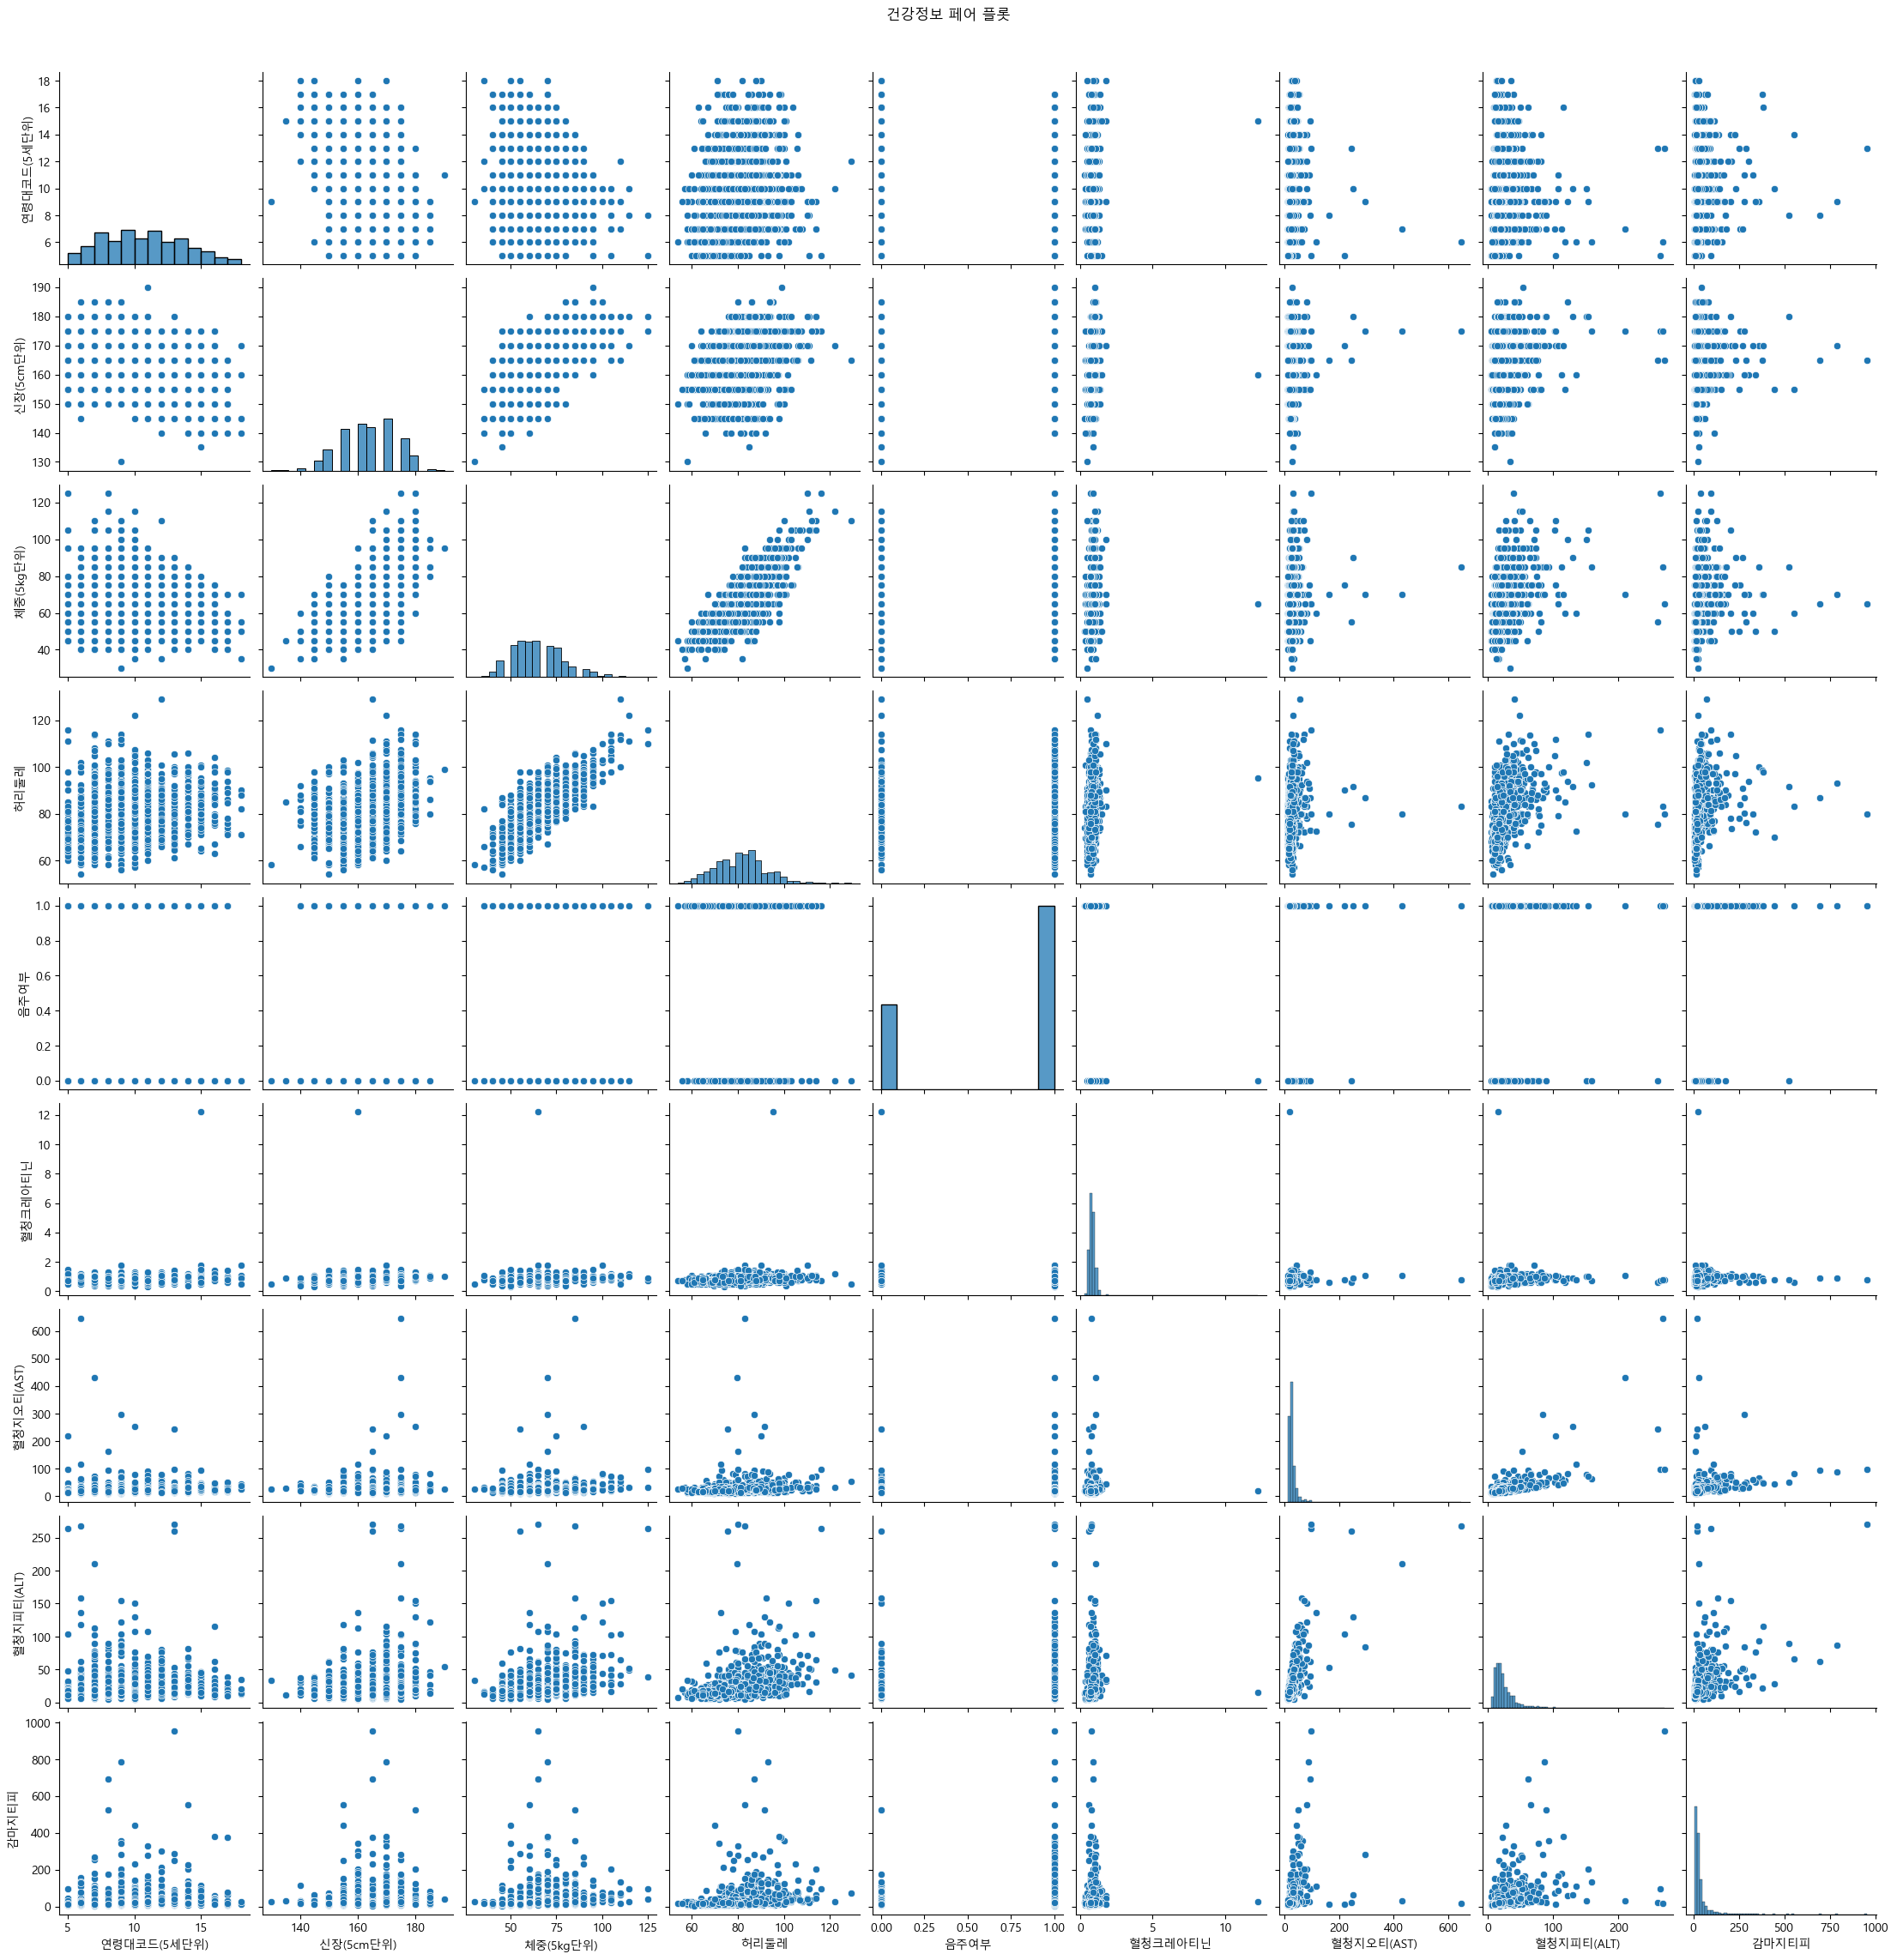

In [83]:
sns.pairplot(sample_train)
plt.suptitle('건강정보 페어 플롯', y=1.02)
plt.show()

In [153]:
sample_vari = sample_train.drop(na_col, axis=1)
sample_test_vari = sample_test.drop(na_col, axis=1)

In [154]:
def check_gpt_status(row):
    if row['성별코드'] == 1:
        return True if 11 <= row['감마지티피'] <= 631 else False
    elif row['성별코드'] == 2:
        return True if 8 <= row['감마지티피'] <= 351 else False
    else:
        return False  # 성별코드가 1도 2도 아닌 경우

# 적용
target = sample_train.apply(check_gpt_status, axis=1)

In [155]:
target

149837    True
891913    True
722046    True
695692    True
566054    True
          ... 
867987    True
439040    True
815986    True
512553    True
134461    True
Length: 1500, dtype: bool

In [156]:
sample_vari.head()

,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,음주여부,grade
149837,2,9,165,50,66.0,1.0,True
891913,1,14,165,75,93.0,1.0,True
722046,1,13,170,70,85.3,0.0,True
695692,2,12,160,45,64.5,1.0,True
566054,2,11,150,55,75.0,1.0,True


In [157]:
# 데이터를 3:7로 나누어봅시다.
def run_models(sample_vari, target):

    from sklearn.model_selection import train_test_split

    # y_titanic_df = df_train['Survived']
    # X_titanic_df = df_train.drop('Survived', axis = 1, inplace = False)
    X_train, X_test, y_train, y_test = train_test_split(sample_vari, target, test_size = 0.3, 
                                                        stratify=target, random_state = 11)
    
    print(X_train.shape, X_test.shape)

    from sklearn.preprocessing import StandardScaler
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score


    # 각 모델에 대한 Classifier 클래스 생성
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn_clf = KNeighborsClassifier(n_neighbors=30)  # k=5는 예시
    dt_clf = DecisionTreeClassifier(random_state=11)
    rf_clf = RandomForestClassifier(random_state=11)
    lr_clf = LogisticRegression(random_state = 11, max_iter=1000)

    # KNN 학습/예측평가
    knn_clf.fit(X_train_scaled, y_train)
    knn_pred = knn_clf.predict(X_test_scaled)
    print('KNeighborsClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, knn_pred)))

    # DecisionTreeClassfier 학습/예측평가
    dt_clf.fit(X_train, y_train)
    dt_pred = dt_clf.predict(X_test)
    print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

    # RandomForestClassifier 학습/예측/평가
    rf_clf.fit(X_train, y_train)
    rf_pred = rf_clf.predict(X_test)
    print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

    # LogisticRegression 학습/예측/평가
    lr_clf.fit(X_train, y_train)
    lr_pred = lr_clf.predict(X_test)
    print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

In [158]:
run_models(sample_vari, target)

(1050, 7) (450, 7)
KNeighborsClassifier 정확도 : 0.9867
DecisionTreeClassifier 정확도 : 1.0000
RandomForestClassifier 정확도 : 1.0000
LogisticRegression 정확도 : 0.9956


In [141]:
def logistic_tuning(train_vari, target, params):

    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import train_test_split

    # y_titanic_df = df_train['Survived']
    # X_titanic_df = df_train.drop('Survived', axis = 1, inplace = False)
    X_train, X_test, y_train, y_test = train_test_split(sample_vari, target, test_size = 0.3, 
                                                        stratify=target, random_state = 11)
    
    model = LogisticRegression(random_state = 11, max_iter=1000)
    grid = GridSearchCV(model, params, scoring = 'accuracy', cv = 7)
    grid.fit(X_train, y_train)

    print('best params:', grid.best_params_)
    print('best score:', grid.best_score_)

    return grid.best_estimator_

In [ ]:
%%time
param_grid = [
    {'solver': ['liblinear'], 'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1]},
    {'solver': ['lbfgs'], 'penalty': ['l2'], 'C': [0.01, 0.1, 1]},
]

best_model = logistic_tuning(sample_vari, target, params = param_grid)

best params: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
best score: 0.984761904761905
CPU times: total: 4.34 s
Wall time: 3.89 s


In [145]:
best_model

LogisticRegression(C=0.01, max_iter=1000, penalty='l1', random_state=11,
                   solver='liblinear')

In [139]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)

In [143]:
from sklearn.model_selection import train_test_split

# y_titanic_df = df_train['Survived']
# X_titanic_df = df_train.drop('Survived', axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(sample_vari, target, test_size = 0.3, 
                                                    stratify=target, random_state = 11)

✅ 정확도: 0.9844
✅ 정밀도: 0.9844
✅ 재현율: 1.0000
✅ F1 스코어: 0.9922
✅ ROC-AUC: 0.4681

✅ 분류 리포트:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00         7
        True       0.98      1.00      0.99       443

    accuracy                           0.98       450
   macro avg       0.49      0.50      0.50       450
weighted avg       0.97      0.98      0.98       450



c:\Users\yongchae\anaconda3\envs\training\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yongchae\anaconda3\envs\training\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\yongchae\anaconda3\envs\training\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

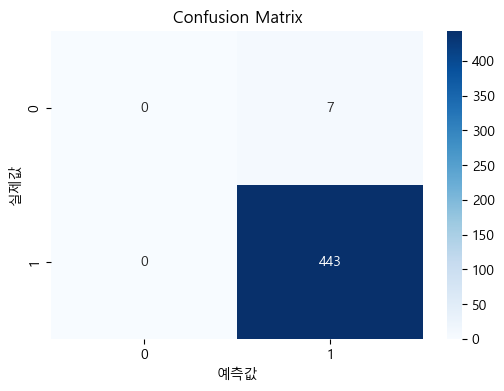

In [144]:
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]  # ROC-AUC 계산용

# 5. 평가 지표 출력
print(f"✅ 정확도: {accuracy_score(y_test, y_pred):.4f}")
print(f"✅ 정밀도: {precision_score(y_test, y_pred):.4f}")
print(f"✅ 재현율: {recall_score(y_test, y_pred):.4f}")
print(f"✅ F1 스코어: {f1_score(y_test, y_pred):.4f}")
print(f"✅ ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
print("\n✅ 분류 리포트:\n", classification_report(y_test, y_pred))

# 6. Confusion Matrix 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("예측값")
plt.ylabel("실제값")
plt.title("Confusion Matrix")
plt.show()